The mean unobscured flux is 106588.875
The chi squared value is 1533.9368951606443


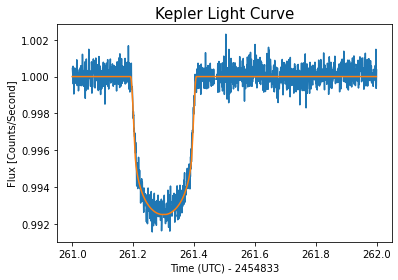

In [2]:
#Problem 1

import pickle
import matplotlib.pyplot as plt
import math as m
import numpy as np
f97 = open("KOI97_01-Copy1.p", "rb") #open for binary read
data97 = pickle.load(f97)
time, flux, flux_err = data97

 
sliced_flux = flux[1154:2610]
sliced_time = time[1154:2610]
sliced_flux_err = flux_err[1154:2610]

for i in range(0,5):
    for j in range(0,1175):
        if ((abs(sliced_flux[j] - np.mean(sliced_flux))) / np.std(sliced_flux)) > 2:
            sliced_flux1 = sliced_flux[0:j]
            sliced_flux2 = sliced_flux[j+1:]
            sliced_flux = np.append(sliced_flux1, sliced_flux2)
            sliced_time1 = sliced_time[0:j]
            sliced_time2 = sliced_time[j+1:]
            sliced_time = np.append(sliced_time1, sliced_time2)
            sliced_flux_err1 = sliced_flux_err[0:j]
            sliced_flux_err2 = sliced_flux_err[j+1:]
            sliced_flux_err = np.append(sliced_flux_err1, sliced_flux_err2)
        else:
            pass

mean = np.mean(sliced_flux)
print("The mean unobscured flux is", mean)

import math as m

def delta(p,r,z):
    if r>=(z+p) or r<=(z-p):
        delta_function=0
        return(delta_function)
    elif (r+z)<=p:
        delta_function=1
        return(delta_function)
    else:
        delta_function=(1/m.pi)*m.acos((z**2-p**2+r**2)/((2*z*r)+.00001)) 
        return(delta_function)
    r=r+.01


#ldf stands for limb darkening function    
def numerator_integral(ldf, lowerbound, upperbound, N, p, z):
    I=0
    step = (upperbound-lowerbound)/(N)
    for i in range(1,N):
        x_i=lowerbound+i*step
        x_i1=lowerbound+(i+1)*step
        f_left=(ldf(x_i))*(1-delta(p,x_i,z))*2*x_i
        f_mid=(ldf((x_i+x_i1)/2))*(1-delta(p,(x_i+x_i1)/2,z))*(x_i+x_i1)
        f_right=(ldf(x_i1))*(1-delta(p,x_i1,z))*2*x_i1
        I=I+step*((1/6)*f_left+(2/3)*f_mid+(1/6)*f_right)   
    
    return I


def denominator_integral(ldf, lowerbound, upperbound, N,p,z):
    I=0
    step = (upperbound-lowerbound)/(N)
    for i in range(1,N):
        x_i=lowerbound+i*step
        x_i1=lowerbound+(i+1)*step
        f_left=(ldf(x_i))*(2*(x_i))
        f_mid=(ldf((x_i+x_i1)/2))*(x_i+x_i1)
        f_right=(ldf(x_i1))*(2*x_i1)
        I=I+step*((1/6)*f_left+(2/3)*f_mid+(1/6)*f_right)   
    return(I)

def ld_func(r): #This is the limb darkening function I want to be passed into the ldf spot in the flux function.
    value = ((1-r**2)**(1/4))
    return(value)

def flx(p, z, ldf, lowerbound, upperbound, N):
    return numerator_integral(ldf, lowerbound,upperbound,N,p,z) / denominator_integral(ldf, lowerbound, upperbound, N,p,z)

z_arr=np.array([])  #Here, I created an array for the z values
for i in range(0,1456):
     z_arr = np.append(z_arr, -3 + (10/1456)*i)

flux_arr_2=np.array([])
for i in range(0,1456): #Here I created a flux array to plot on the y-axis.
    flux_arr_2 = np.append(flux_arr_2, flx(.0775, abs(-3 + (10/1456)*i), ld_func, 0, 1, 1000))
      
norm_flux = flux / mean        
norm_flux_err = flux_err / mean


chi_squared = 0
for i in range(1154,2610):
    chi_squared = chi_squared + ((norm_flux[i] - flux_arr_2[i-1154]) / norm_flux_err[i])**2
print("The chi squared value is", chi_squared)
        
        
        
        
plt.plot(time[1154:2610], flux[1154:2610]/mean)
plt.title('Kepler Light Curve', fontsize=15)
plt.xlabel('Time (UTC) - 2454833', fontsize=10)
plt.ylabel('Flux [Counts/Second]', fontsize=10)
   
    
plt.title('Kepler Light Curve', fontsize=15)
plt.xlabel('Time (UTC) - 2454833', fontsize=10)
plt.ylabel('Flux [Counts/Second]', fontsize=10)
plt.plot(.1*z_arr + 261.3, flux_arr_2)
plt.show()



        


In [7]:
#Problem 2

#By eye, the fit above looks accurate. However, the p-value is high, so there is a high chance that the value of chi
#squared calculated is exceeded. 

import scipy.special as sp

P = sp.gammainc(1453/2, chi_squared/2)

print("The probability of getting chi squared value of at least", chi_squared,"is", P)




The probability of getting chi squared value of at least 1533.9368951606443 is 0.9314547275941522


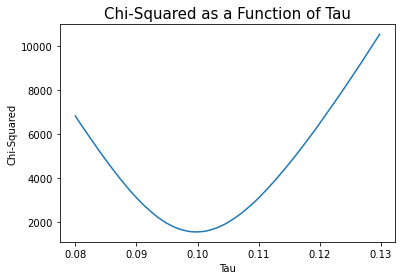

In [20]:
#Problem 3 

def z_initial(tau_proxy):
    return ((261 - 261.3) / (.08 + tau_proxy*(.13-.08)/1456))

def z_final(tau_proxy):
    return ((262 - 261.3) / (.08 + tau_proxy*(.13-.08)/1456))

tau_array = np.array([])
chi_array = np.array([])

for i in range(0,1456,10):
    chi_squared = 0
    flux_array = np.array([])
    for j in range(0,1456): 
        flux_array = np.append(flux_array, flx(.0775, abs(z_initial(i) + ((z_final(i) - z_initial(i))/1456)*j), ld_func, 0, 1, 100))
    for k in range(1154,2610):
        chi_squared = chi_squared + ((norm_flux[k] - flux_array[k-1154]) / norm_flux_err[k])**2
    tau_array = np.append(tau_array, (.08 + i*(.13-.08)/1456))
    chi_array = np.append(chi_array, chi_squared)

    

plt.title('Chi-Squared as a Function of Tau', fontsize=15)
plt.xlabel('Tau', fontsize=10)
plt.ylabel('Chi-Squared', fontsize=10)
plt.plot(tau_array, chi_array)
plt.show()

The minimum chi-squared value is 1533.5244240457305
The tau value that minimizes chi-squared is 0.09957417582417583
The probability of getting chi squared value of at least 1533.5244240457305 is 0.9304742545636443
The one sigma uncertainty of the tau parameter is 0.01447307040720228


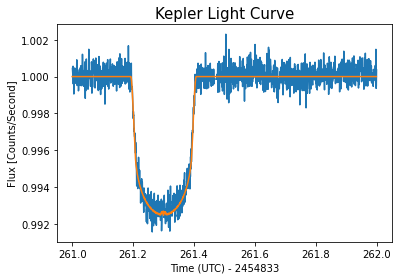

In [34]:
#Problem 3

left_point = 0
mid_point = 146/2
right_point = 146
new_point = 146/4

while m.floor(right_point) - m.ceil(left_point) > 2:
    
    if chi_array[round(new_point)] > chi_array[round(mid_point)]:
        left_point = new_point
        new_point = (mid_point + right_point) / 2
        
        if chi_array[round(new_point)] > chi_array[round(mid_point)]:
            right_point = new_point
            new_point = (mid_point + left_point) / 2
        else:
            left_point = mid_point
            mid_point = new_point
            new_point = (mid_point + left_point) / 2
    else:
        right_point = mid_point
        mid_point = new_point
        new_point = (mid_point + right_point) / 2
        
        if chi_array[round(new_point)] > chi_array[round(mid_point)]:
            right_point = new_point
            new_point = (mid_point + left_point) / 2
        else:
            left_point = mid_point
            mid_point = new_point
            new_point = (mid_point + left_point) / 2

print("The minimum chi-squared value is", chi_array[round(mid_point)])
print("The tau value that minimizes chi-squared is", tau_array[round(mid_point)])

z_initial = (261 - 261.3) / (tau_array[round(mid_point)])
z_final = (262 - 261.3) / (tau_array[round(mid_point)])
z_array = np.array([])  
for i in range(0,1456):
     z_array = np.append(z_array, z_initial + ((z_final - z_initial)/1456)*i)

flux_array = np.array([])
for i in range(0,1456):
    flux_array = np.append(flux_array, flx(.0775, abs(z_initial + ((z_final - z_initial)/1456)*i), ld_func, 0, 1, 100))
                       
P = sp.gammainc(1453/2, chi_array[round(mid_point)]/2)
print("The probability of getting chi squared value of at least", chi_array[round(mid_point)],"is", P)

one_sigma_uncertainty = np.std(tau_array)
print("The one sigma uncertainty of the tau parameter is", one_sigma_uncertainty)

plt.plot(time[1154:2610], flux[1154:2610]/mean)
plt.title('Kepler Light Curve', fontsize=15)
plt.xlabel('Time (UTC) - 2454833', fontsize=10)
plt.ylabel('Flux [Counts/Second]', fontsize=10)
   
    
plt.title('Kepler Light Curve', fontsize=15)
plt.xlabel('Time (UTC) - 2454833', fontsize=10)
plt.ylabel('Flux [Counts/Second]', fontsize=10)
plt.plot((tau_array[round(mid_point)])*z_array + 261.3, flux_array)
plt.show()

